In [ ]:
! pip install qiskit
! pip install pylatexenc
! pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-cxhtsyis
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-cxhtsyis
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 18fa9cca7495c8b935d7c374b5b496b65b4c337f
  Preparing metadata (setup.py) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning h

# Simons Algorithm

In [ ]:
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister

In [ ]:
# input bitstring
s = "1111"

In [ ]:
n = len(s)

In [ ]:
# build the quantum registers
q = QuantumRegister(2*n)
c = ClassicalRegister(2*n)
qc = QuantumCircuit(q,c)

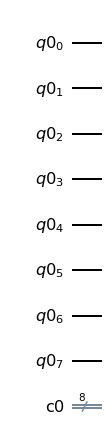

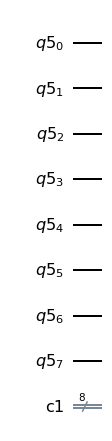

In [ ]:
qc.draw("mpl")

Apply Hadamard Gates to |x>

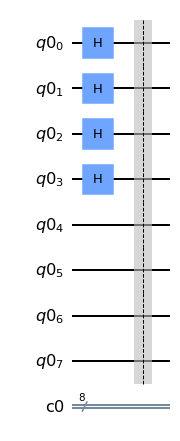

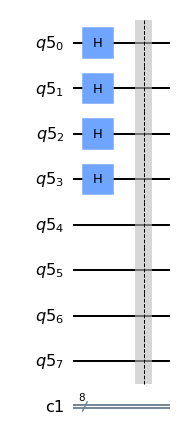

In [ ]:
for i in range(n):
  qc.h(q[i])
qc.barrier()
qc.draw("mpl")

Create the simons oracle function that is already impremented

In [ ]:
from qiskit_textbook.tools import simon_oracle

In [ ]:
qc = qc.compose(simon_oracle(s))

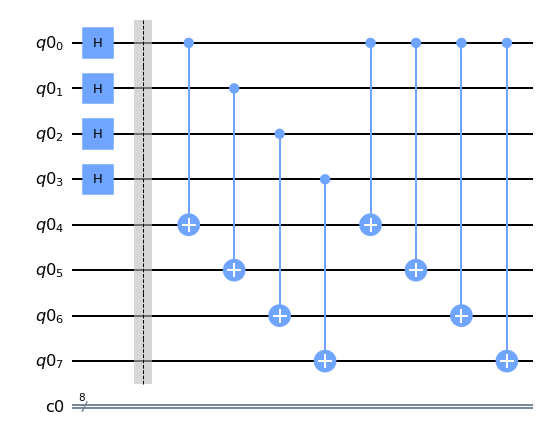

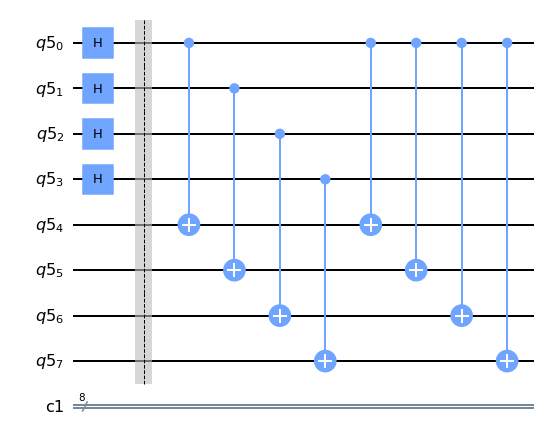

In [ ]:
qc.draw("mpl")

In [ ]:
qc.barrier()

Measure the |y> register

In [ ]:
for i in range(4,2*n):
  qc.measure(q[i],c[i])
qc.barrier()


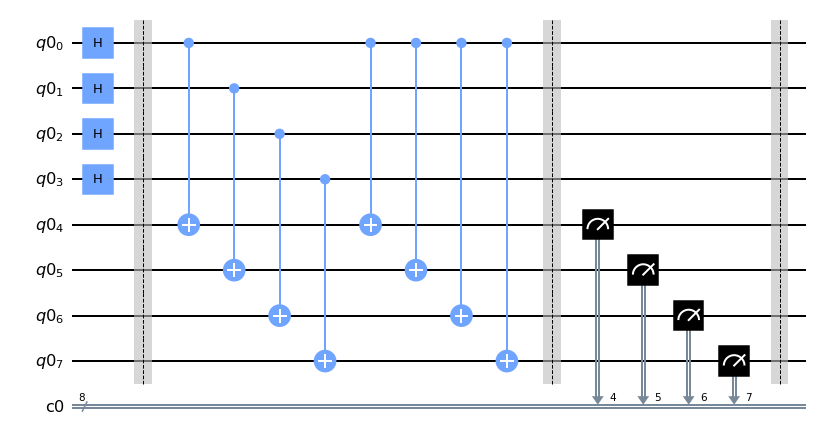

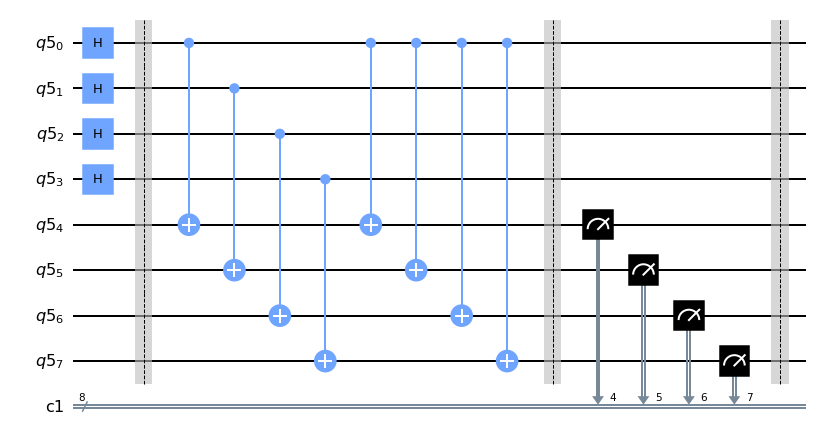

In [ ]:
qc.draw("mpl")

Apply hadamard gates on |x>

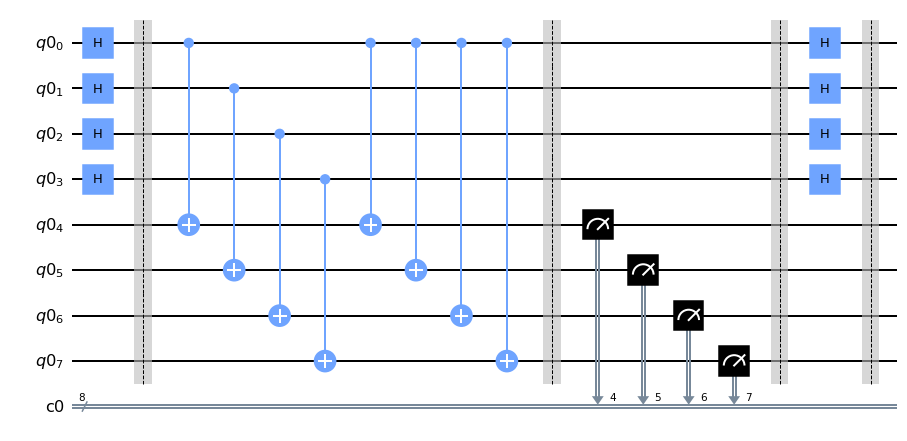

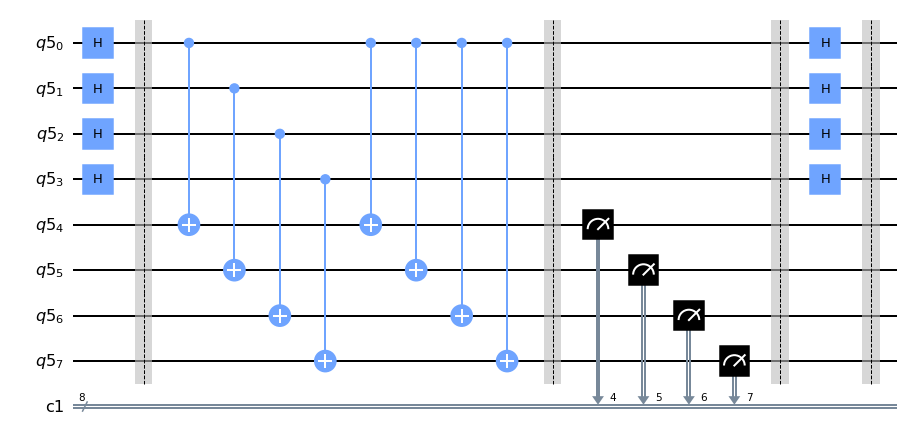

In [ ]:
for i in range(n):
  qc.h(q[i])
qc.barrier()
qc.draw("mpl")

Measure the |x> register 

In [ ]:
"""
for i in range(n):
  qc.measure(q[i],c[i])
qc.draw("mpl")
"""

'\nfor i in range(n):\n  qc.measure(q[i],c[i])\nqc.draw("mpl")\n'

'\nfor i in range(n):\n  qc.measure(q[i],c[i])\nqc.draw("mpl")\n'

In [ ]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'10000000': 126, '11000000': 134, '11100000': 134, '10100000': 135, '00000000': 116, '00100000': 120, '01000000': 135, '01100000': 124}
{'00000000': 114, '11100000': 122, '10100000': 134, '10000000': 121, '01000000': 143, '01100000': 140, '11000000': 117, '00100000': 133}


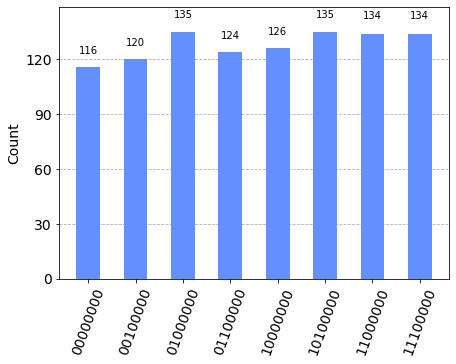

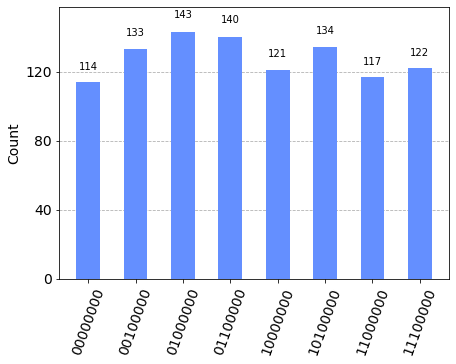

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [ ]:
# real quantum computer simulation
from qiskit.providers.fake_provider import FakeJohannesburg
from qiskit.visualization import plot_error_map

In [ ]:
device_simulator = FakeJohannesburg()

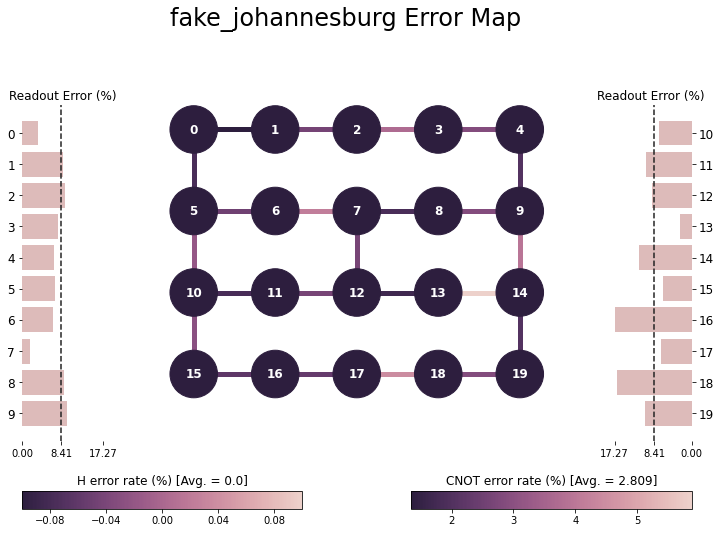

In [ ]:
plot_error_map(device_simulator)

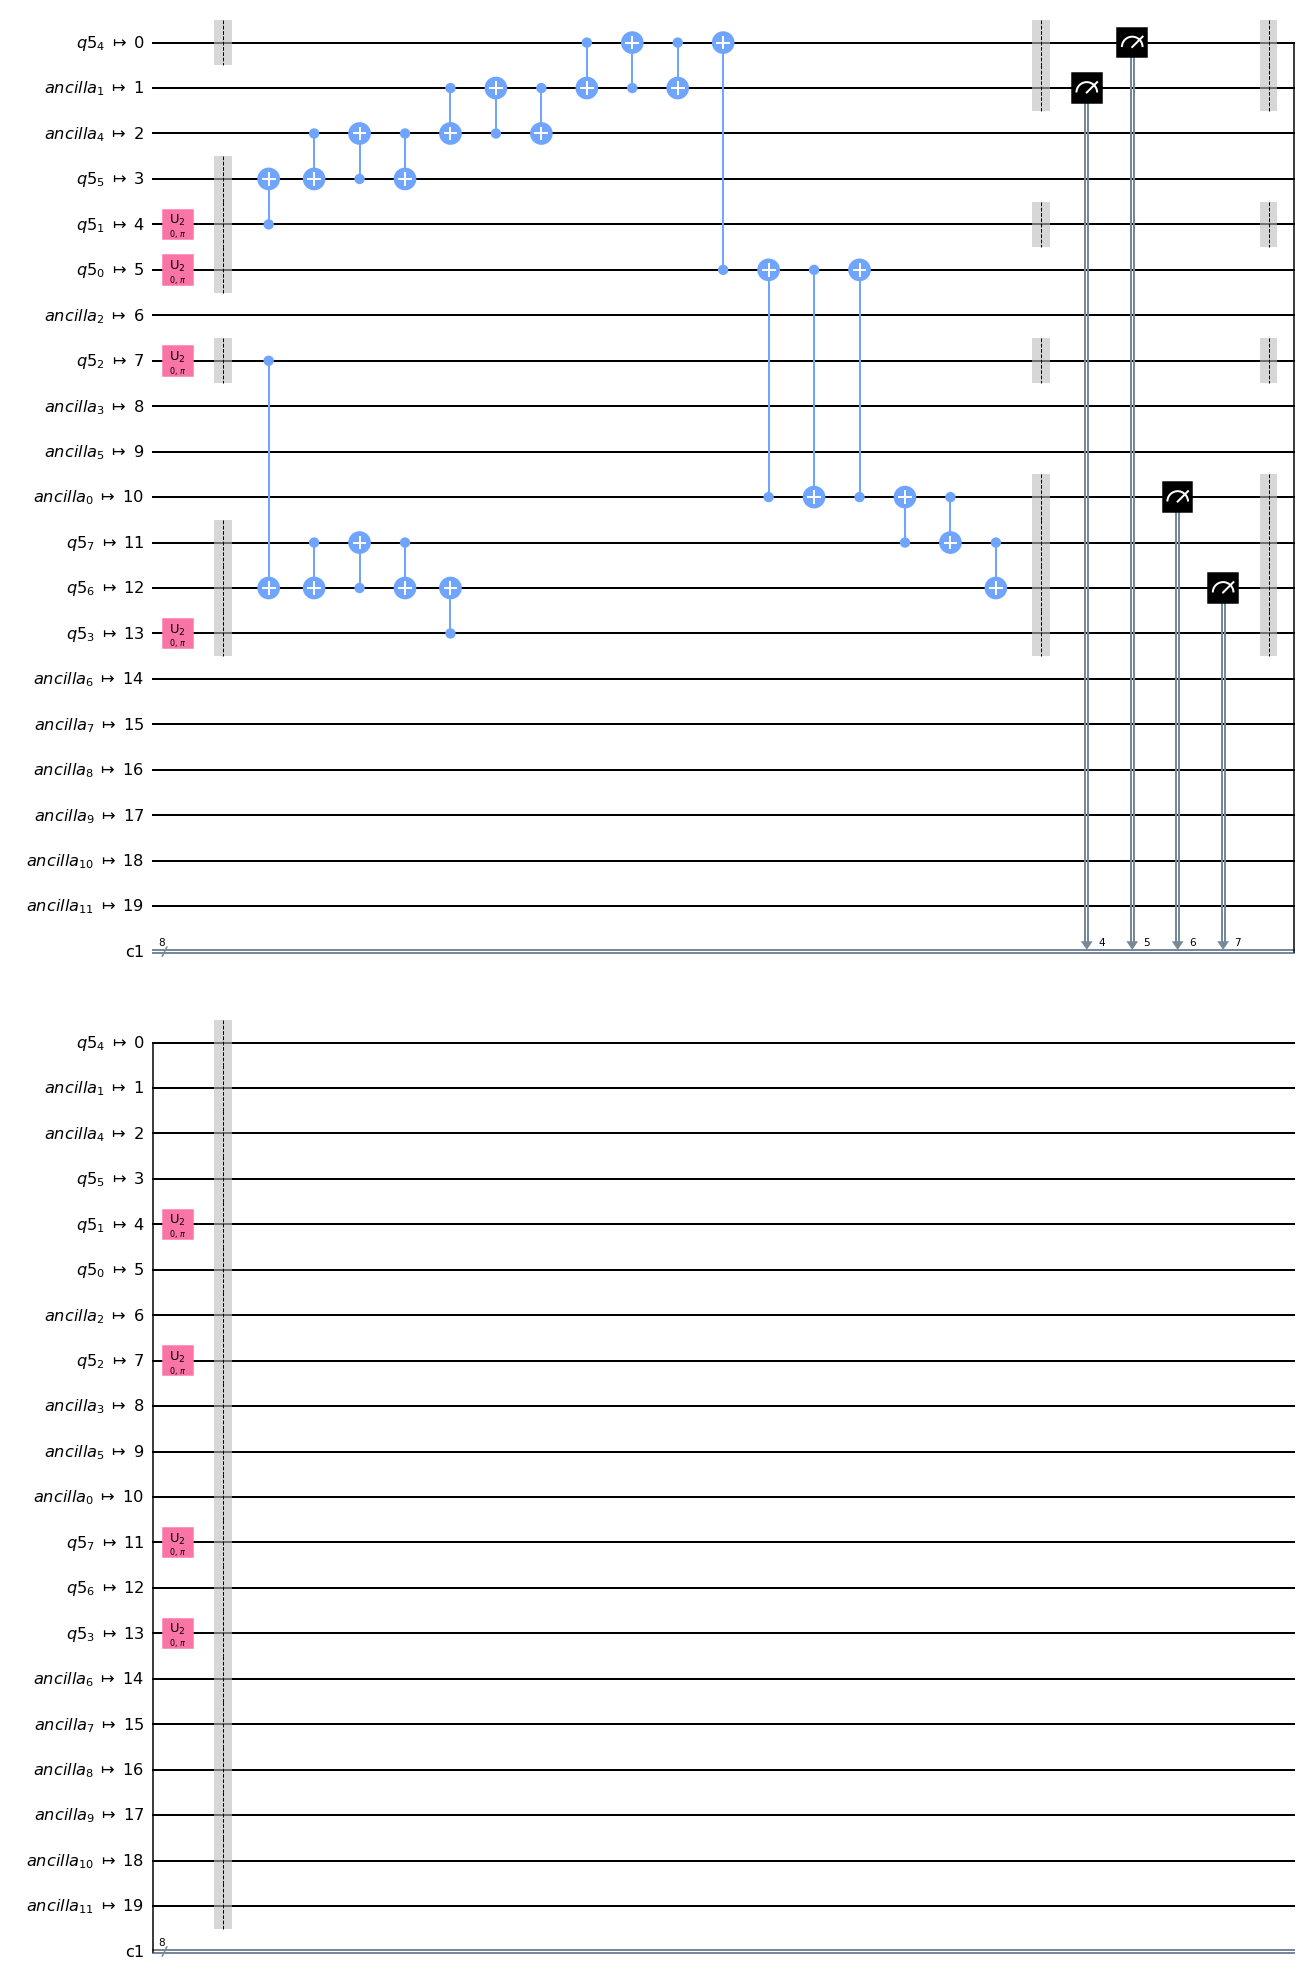

In [ ]:
qc2 = transpile(qc,device_simulator)
qc2.draw("mpl")

In [ ]:
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'10000000': 109, '01000000': 128, '01100000': 143, '11000000': 149, '00100000': 122, '00000000': 129, '10100000': 127, '11100000': 117}


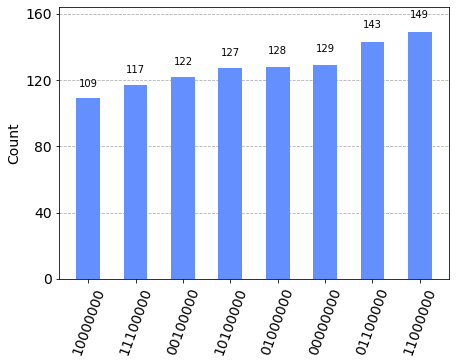

In [ ]:
plot_histogram(counts,sort="value")